<a href="https://colab.research.google.com/github/Sa-ndy/Projects/blob/master/Ann-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [4]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [5]:
from sklearn.model_selection import train_test_split
x_train_full,x_test,y_train_full,y_test = train_test_split(housing.data,housing.target,random_state=42)
x_train,x_valid,y_train,y_valid=train_test_split(x_train_full,y_train_full,random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_valid=scaler.fit_transform(x_valid)
x_test=scaler.fit_transform(x_test)

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
x_train.shape

(11610, 8)

In [10]:
model=keras.models.Sequential([keras.layers.Dense(30,activation="relu",input_shape=[8]),
                               keras.layers.Dense(30,activation="relu"),keras.layers.Dense(1)])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 30)                270       
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss="mean_squared_error",optimizer=keras.optimizers.SGD(lr=1e-3),metrics=['mae'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [21]:
model_history=model.fit(x_train,y_train,epochs=20,validation_data=(x_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4050 - mae: 0.4591 - val_loss: 0.4477 - val_mae: 0.4893
Epoch 2/20
363/363 [==============================] - 2s 4ms/step - loss: 0.4010 - mae: 0.4558 - val_loss: 0.4500 - val_mae: 0.4957
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3979 - mae: 0.4546 - val_loss: 0.4445 - val_mae: 0.4867
Epoch 4/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3944 - mae: 0.4517 - val_loss: 0.4440 - val_mae: 0.4903
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3915 - mae: 0.4498 - val_loss: 0.4400 - val_mae: 0.4841
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3884 - mae: 0.4482 - val_loss: 0.4403 - val_mae: 0.4832
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3863 - mae: 0.4459 - val_loss: 0.4375 - val_mae: 0.4823
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.

In [22]:
mae_test = model.evaluate(x_test,y_test)

162/162 [==============================] - 0s 3ms/step - loss: 0.3792 - mae: 0.4481


In [23]:
model_history.history

{'loss': [0.4050368368625641,
  0.4010152518749237,
  0.3978595435619354,
  0.39443865418434143,
  0.39153724908828735,
  0.38838016986846924,
  0.38626885414123535,
  0.3835833668708801,
  0.38126644492149353,
  0.37895670533180237,
  0.377229243516922,
  0.3748754560947418,
  0.373665452003479,
  0.3714776337146759,
  0.3698321580886841,
  0.3685283660888672,
  0.36684975028038025,
  0.36577358841896057,
  0.3639894127845764,
  0.36285293102264404],
 'mae': [0.4590831995010376,
  0.45581331849098206,
  0.4545583128929138,
  0.45173004269599915,
  0.4498139023780823,
  0.4482266306877136,
  0.44588223099708557,
  0.44440731406211853,
  0.44314277172088623,
  0.4412890672683716,
  0.4396083950996399,
  0.43841713666915894,
  0.4371710419654846,
  0.43573373556137085,
  0.4345584213733673,
  0.43391379714012146,
  0.4326018691062927,
  0.4316120743751526,
  0.43019571900367737,
  0.4294089674949646],
 'val_loss': [0.44769757986068726,
  0.4499671459197998,
  0.4445008337497711,
  0.4440

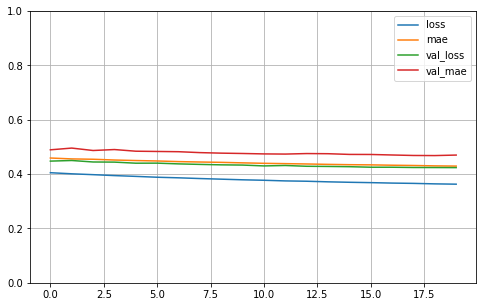

In [24]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [25]:
x_new=x_test[:3]

In [26]:
y_pred=model.predict(x_new)
print(y_pred)
print(y_test[:3])

[[0.7242816]
 [1.7476454]
 [4.1995516]]
[0.477   0.458   5.00001]
